# Problem 1: Linear Regression 
You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [140]:
df = pd.read_csv('cubic_zirconia.csv')

In [141]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [142]:
# We can say - 
# 1. There is no use of column unnamed:0
# 2. Our dependent variable will be price for Linear Regression model

In [143]:
df.shape

(26967, 11)

In [144]:
# Data consists of 26767 rows and 11 columns

In [145]:
# Dropping the Unnamed:0 column
df = df.drop(['Unnamed: 0'],axis=1)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [147]:
# We can say - 
# 1. Dataset has 4 object type/categorical variables namely cut, color, clarity
# 2. Dataset has 6 float type variables namely carat, depth, table, x, y, z, price
#  3. Dataset has 1 int type variable which is price.


In [148]:
df.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [149]:
# We cam say- 
# There are total 26967 records
# Depth has 26270 records. It states that it has some missing values.
# Cut , color , clarity has some unique values
# By looking at 5 point summary it seems that some variables have outliers.

In [150]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [151]:
# We can see that column depth has null/missing values

# Univariate Analysis

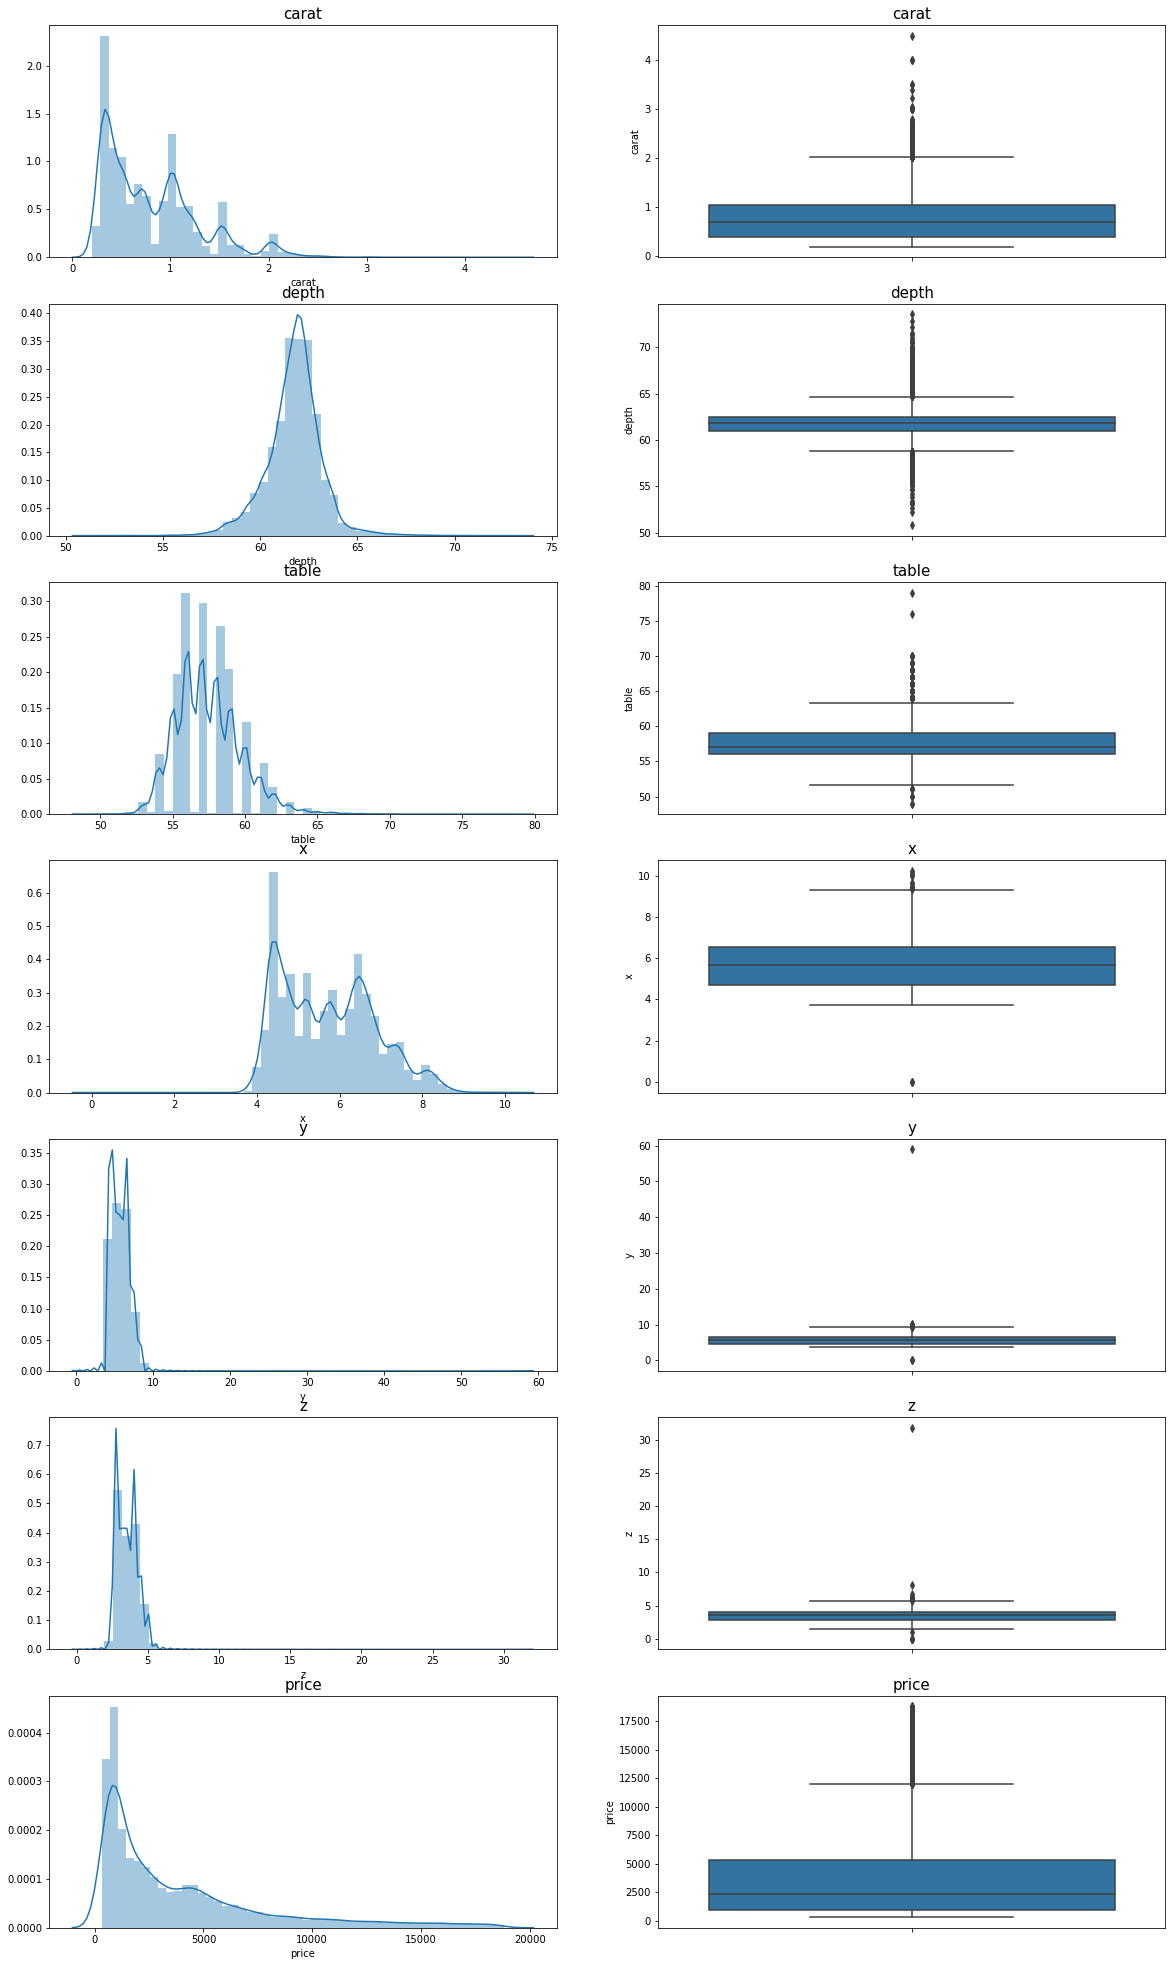

In [152]:
fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20, 35)

uplot = sns.distplot(df['carat'] , ax=axes[0][0])
uplot.set_title("carat",fontsize=15)
uplot = sns.boxplot(df['carat'] , orient = "v" , ax=axes[0][1])
uplot.set_title("carat",fontsize=15)

uplot = sns.distplot(df['depth'] , ax=axes[1][0])
uplot.set_title("depth",fontsize=15)
uplot = sns.boxplot(df['depth'] , orient = "v" , ax=axes[1][1])
uplot.set_title("depth",fontsize=15)

uplot = sns.distplot(df['table'] , ax=axes[2][0])
uplot.set_title("table",fontsize=15)
uplot = sns.boxplot(df['table'] , orient = "v" , ax=axes[2][1])
uplot.set_title("table",fontsize=15)

uplot = sns.distplot(df['x'] , ax=axes[3][0])
uplot.set_title("x",fontsize=15)
uplot = sns.boxplot(df['x'] , orient = "v" , ax=axes[3][1])
uplot.set_title("x",fontsize=15)

uplot = sns.distplot(df['y'] , ax=axes[4][0])
uplot.set_title("y",fontsize=15)
uplot = sns.boxplot(df['y'] , orient = "v" , ax=axes[4][1])
uplot.set_title("y",fontsize=15)

uplot = sns.distplot(df['z'] , ax=axes[5][0])
uplot.set_title("z",fontsize=15)
uplot = sns.boxplot(df['z'] , orient = "v" , ax=axes[5][1])
uplot.set_title("z",fontsize=15)

uplot = sns.distplot(df['price'] , ax=axes[6][0])
uplot.set_title("price",fontsize=15)
uplot = sns.boxplot(df['price'] , orient = "v" , ax=axes[6][1])
uplot.set_title("price",fontsize=15)

plt.show()


In [153]:
# We can say -
#Distribution of column carat is right skewed and has outliers.
#Distribution of column depth looks normally distributed and also has outliers.
#Distribution of column table is right skewed and also has outliers.
#Distribution of column x is right skewed and also has outliers.
#Distribution of column y is right skewed and also has outliers.
#Distribution of column z is right skewed and also has outliers.
#Distribution of column price is right skewed and also has outliers.


# Bivariate Analysis

Text(0.5, 1.0, 'clarity')

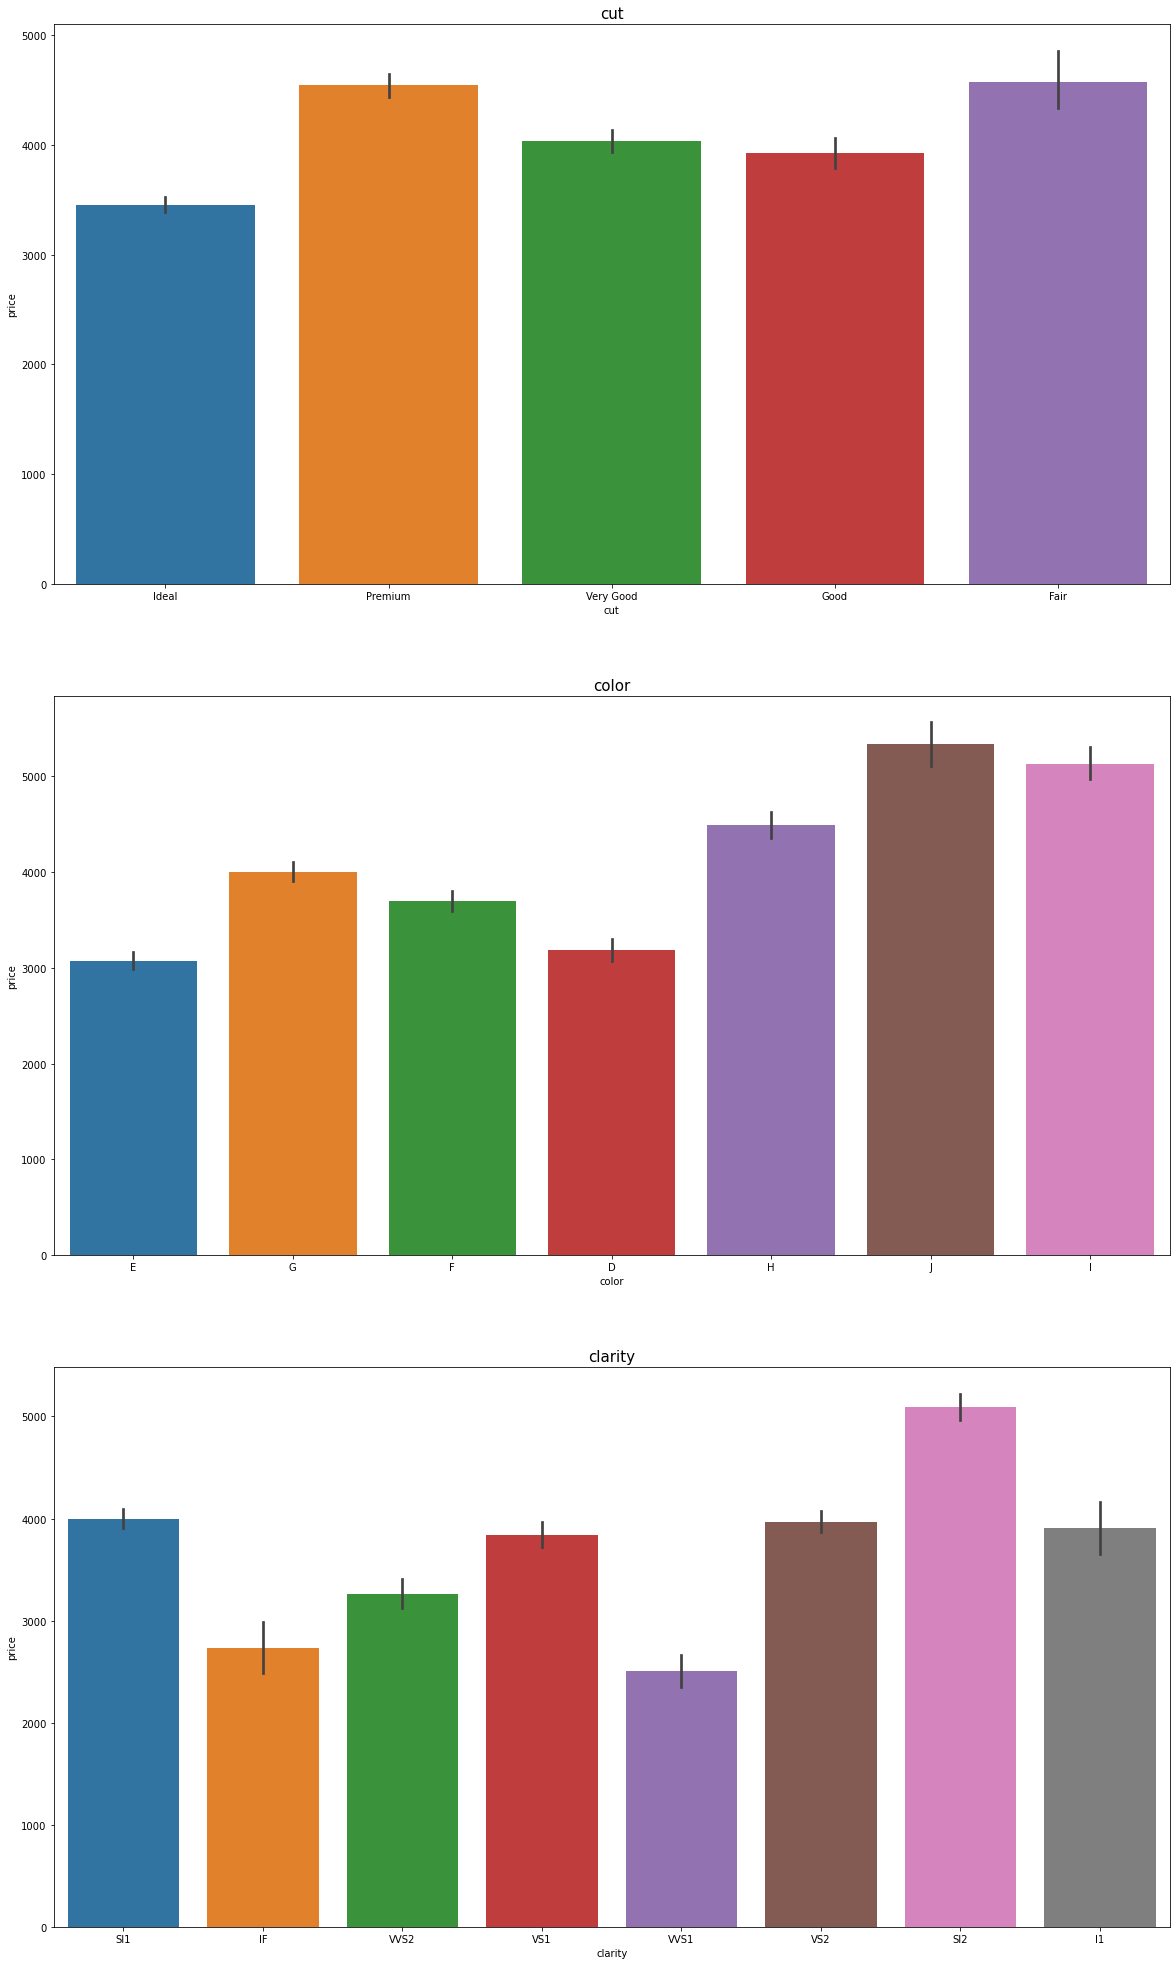

In [154]:
fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(20, 35)

uplot = sns.barplot(df['cut'],df['price'] , ax=axes[0])
uplot.set_title("cut",fontsize=15)

uplot = sns.barplot(df['color'],df['price'] , ax=axes[1])
uplot.set_title("color",fontsize=15)

uplot = sns.barplot(df['clarity'],df['price'] , ax=axes[2])
uplot.set_title("clarity",fontsize=15)


# Multivariate Analysis

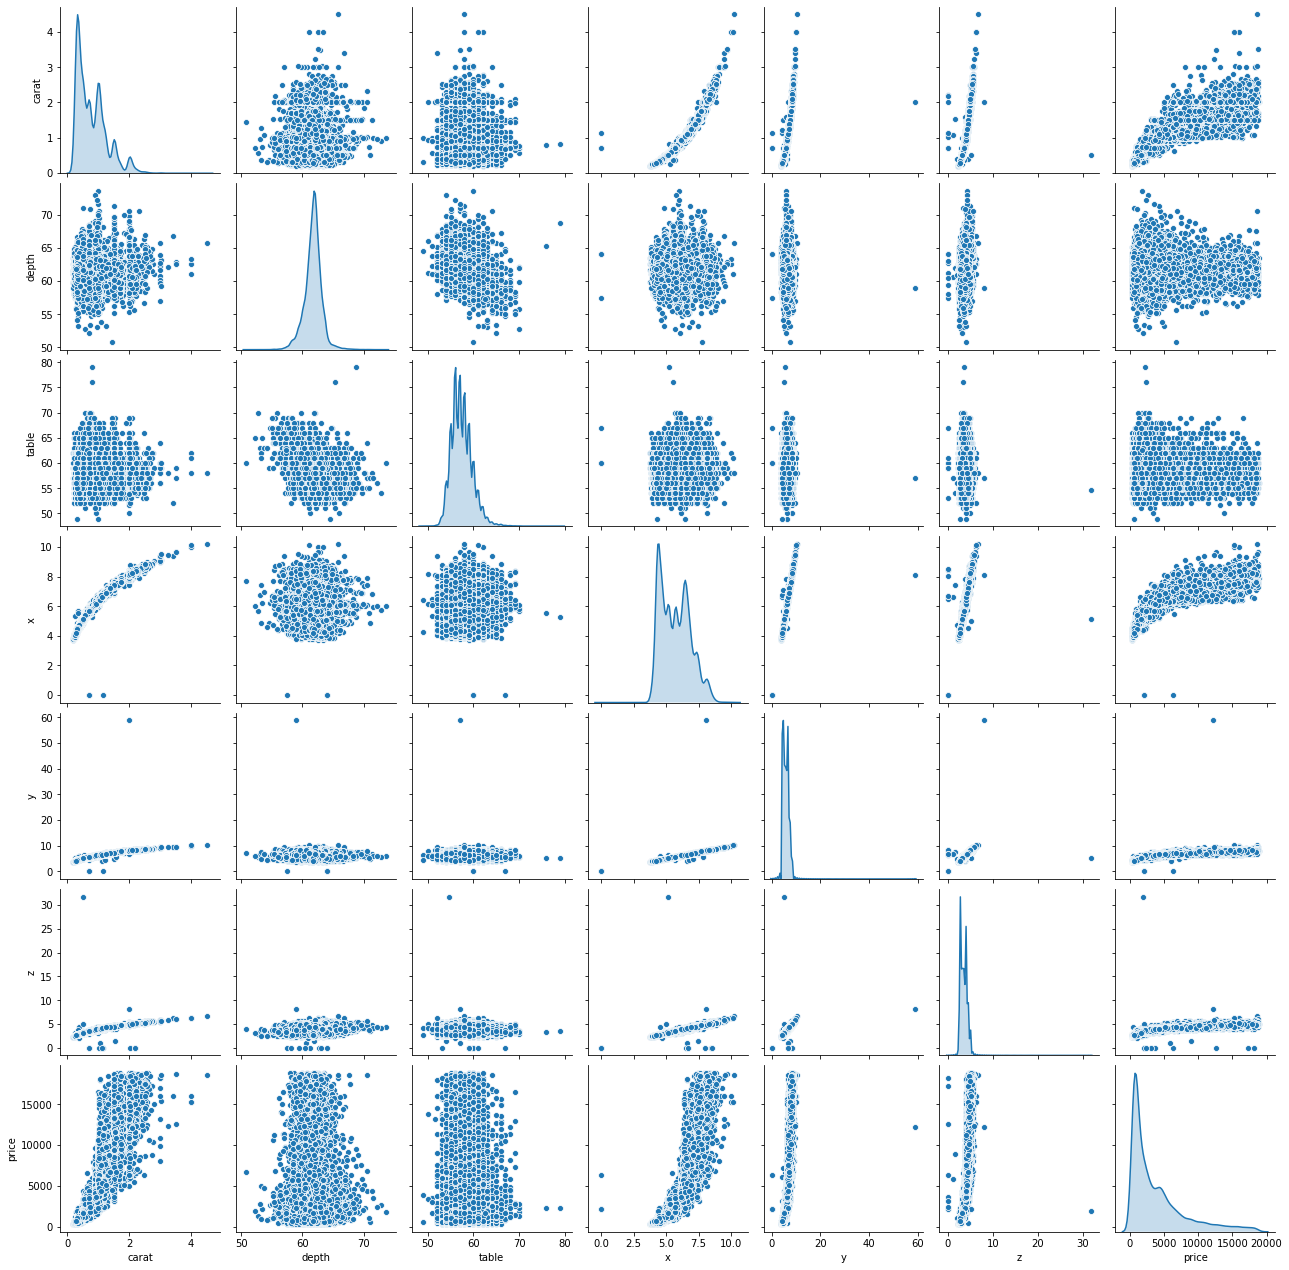

In [155]:
sns.pairplot(df,diag_kind='kde')

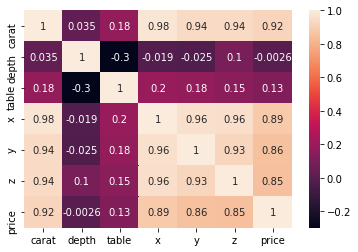

In [156]:

fig.set_size_inches(20, 35)
sns.heatmap(df.corr(),annot=True)
plt.show()

In [157]:
# carat , x , y , Z variables have correlation with each other

In [158]:
# Checking the outliers column wise
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

carat       662
clarity       0
color         0
cut           0
depth      1225
price      1779
table       318
x            15
y            15
z            23
dtype: int64

In [159]:
# Treating outliers by defining custom function to calculate upper and lower values
def remove_outlier(col):
    sorted(col)
    Q1 , Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    Upper_range = Q3+(1.5 * IQR)
    return lower_range , Upper_range

In [160]:
lcarat,ucarat=remove_outlier(df['carat'])
df['carat']=np.where(df['carat']>ucarat,ucarat,df['carat'])
df['carat']=np.where(df['carat']<lcarat,lcarat,df['carat'])

ldepth,udepth=remove_outlier(df['depth'])
df['depth']=np.where(df['depth']>udepth,udepth,df['depth'])
df['depth']=np.where(df['depth']<ldepth,ldepth,df['depth'])

lprice,uprice=remove_outlier(df['price'])
df['price']=np.where(df['price']> uprice, uprice,df['price'])
df['price']=np.where(df['price']< lprice, lprice,df['price'])

ltable,utable=remove_outlier(df['table'])
df['table']=np.where(df['table']> utable, utable,df['table'])
df['table']=np.where(df['table']< ltable, ltable,df['table'])

lFx,uFx=remove_outlier(df['x'])
df['x']=np.where(df['x']> uFx, uFx,df['x'])
df['x']=np.where(df['x']< lFx, lFx,df['x'])

lPy,uPy=remove_outlier(df['y'])
df['y']=np.where(df['y']> uPy, uPy,df['y'])
df['y']=np.where(df['y']< lPy, lPy,df['y'])

lz,uz=remove_outlier(df['z'])
df['z']=np.where(df['z']> uz, uz,df['z'])
df['z']=np.where(df['z']< lz, lz,df['z'])


In [161]:
# Checking the outliers column wise
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

carat         0
clarity       0
color         0
cut           0
depth      1225
price         0
table         0
x             0
y             0
z             0
dtype: int64

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [162]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [163]:
# There are 697 null values in depth column.
# as there are outliers in depth variable we should impute the null values with median
df['depth'].fillna(df['depth'].median(),inplace = True)

In [164]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [165]:
#  Yes, we need scaling in this as dimensions of cubic zirconia diamond that is length, width and height are in mm and to scaling helps in normalizing the data.
# It is always good idea to do scaling as the model performance significantly increases. 

# 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [166]:
print(df.cut.unique())
print(df.color.unique())
print(df.clarity.unique())

['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
['E' 'G' 'F' 'D' 'H' 'J' 'I']
['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


In [167]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit_transform

<bound method LabelEncoder.fit_transform of LabelEncoder()>

In [168]:
df1 = df.copy()
cutDictionary = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}
colorDictionary = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}
clarityDictionary = {
    'FL': 11, 
    'IF': 10, 
    'VVS1': 9, 
    'VVS2': 8, 
    'VS1': 7, 
    'VS2': 6, 
    'SI1': 5, 
    'SI2': 4, 
    'I1': 3, 
    'I2': 2, 
    'I3': 1
}
df1['cut'] = df1['cut'].map(cutDictionary)
df1['color'] = df1['color'].map(colorDictionary)
df1['clarity'] = df1['clarity'].map(clarityDictionary)

In [169]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,5,62.1,58.0,4.27,4.29,2.66,499.0
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.70,984.0
2,0.90,3,6,8,62.2,60.0,6.04,6.12,3.78,6289.0
3,0.42,5,5,7,61.6,56.0,4.82,4.80,2.96,1082.0
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65,779.0


In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int64  
 2   color    26967 non-null  int64  
 3   clarity  26967 non-null  int64  
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.1 MB


In [171]:
# Separating independent and target variables 

In [172]:
X = df1.drop('price', axis=1)

y = df1[['price']]

In [173]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5,6,5,62.1,58.0,4.27,4.29,2.66
1,0.33,4,4,10,60.8,58.0,4.42,4.46,2.70
2,0.90,3,6,8,62.2,60.0,6.04,6.12,3.78
3,0.42,5,5,7,61.6,56.0,4.82,4.80,2.96
4,0.31,5,5,9,60.4,59.0,4.35,4.43,2.65


In [174]:
y.head()

,price
0,499.0
1,984.0
2,6289.0
3,1082.0
4,779.0


In [175]:
# Splitting the data into train and test

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [177]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11687,0.41,5,2,8,62.3,56.0,4.77,4.73,2.96
9728,1.71,5,1,5,62.8,57.0,7.58,7.55,4.75
1936,0.33,2,5,5,61.8,62.0,4.40,4.45,2.74
26220,0.70,3,3,5,62.8,57.0,5.61,5.66,3.54
18445,0.70,5,7,4,62.1,56.0,5.67,5.71,3.53
...,...,...,...,...,...,...,...,...,...
10955,0.21,4,7,6,61.6,59.0,3.82,3.78,2.34
17289,0.31,4,3,6,61.9,58.0,4.39,4.37,2.71
5192,2.01,5,6,4,62.2,57.0,8.04,8.09,5.02
12172,1.54,5,2,4,60.3,59.0,7.43,7.46,4.49


In [178]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
18031,2.01,1,2,4,66.5,61.0,7.81,7.75,5.17
26051,1.51,4,5,5,62.2,59.0,7.34,7.30,4.55
16279,0.50,3,3,5,60.9,61.0,5.06,5.15,3.11
16466,0.31,5,6,7,61.8,56.0,4.39,4.44,2.66
19837,1.20,3,3,7,62.0,57.0,6.77,6.81,4.21
...,...,...,...,...,...,...,...,...,...
9716,0.32,5,2,10,62.2,57.0,4.37,4.35,2.71
9944,0.70,4,3,8,62.1,58.0,5.71,5.66,3.53
9858,0.71,5,4,4,61.1,56.0,5.75,5.77,3.52
4075,1.51,3,1,4,62.8,59.0,7.23,7.26,4.55


In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
# Scaling the data

In [181]:
from scipy.stats import zscore
X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)
y_train = y_train.apply(zscore)
y_test = y_test.apply(zscore)

In [182]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
11687,-0.828710,0.987756,-1.401996,1.187046,0.395675,-0.669095,-0.851279,-0.895171,-0.827069
9728,1.983254,0.987756,-1.988276,-0.642867,0.754075,-0.204361,1.643548,1.626182,1.740161
1936,-1.001754,-1.707630,0.356843,-0.642867,0.037275,2.119307,-1.179779,-1.145518,-1.142594
26220,-0.201426,-0.809168,-0.815717,-0.642867,0.754075,-0.204361,-0.105494,-0.063661,0.004771
18445,-0.201426,0.987756,1.529403,-1.252839,0.252315,-0.669095,-0.052224,-0.018956,-0.009571
...,...,...,...,...,...,...,...,...,...
10955,-1.261320,0.089294,1.529403,-0.032896,-0.106084,0.725106,-1.694725,-1.744562,-1.716277
17289,-1.045015,0.089294,-0.815717,-0.032896,0.108955,0.260372,-1.188657,-1.217045,-1.185620
5192,2.632168,0.987756,0.943123,-1.252839,0.323995,-0.204361,2.051954,2.108994,2.127396
12172,1.615535,0.987756,-1.401996,-1.252839,-1.037923,0.725106,1.510372,1.545714,1.367267


In [183]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
18031,2.626661,-2.631987,-1.406184,-1.232242,3.414634,1.647329,1.840904,1.800533,2.339552
26051,1.546003,0.062497,0.351673,-0.631491,0.327897,0.725417,1.424445,1.398790,1.450408
16279,-0.636926,-0.835664,-0.820232,-0.631491,-0.605303,1.647329,-0.595826,-0.520650,-0.614703
16466,-1.047576,0.960659,0.937625,0.570012,0.040759,-0.657450,-1.189502,-1.154511,-1.260050
19837,0.875995,-0.835664,-0.820232,0.570012,0.184328,-0.196494,0.919377,0.961336,0.962812
...,...,...,...,...,...,...,...,...,...
9716,-1.025963,0.960659,-1.406184,2.372266,0.327897,-0.196494,-1.207223,-1.234860,-1.188345
9944,-0.204663,0.062497,-0.820232,1.170763,0.256112,0.264461,-0.019871,-0.065341,-0.012379
9858,-0.183049,0.960659,-0.234280,-1.232242,-0.461733,-0.657450,0.015572,0.032863,-0.026720
4075,1.546003,-0.835664,-1.992136,-1.232242,0.758604,0.725417,1.326975,1.363079,1.450408


In [184]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [185]:
# Exploring the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.178540910600686
The coefficient for cut is 0.034729711277533014
The coefficient for color is 0.13416117479808776
The coefficient for clarity is 0.20358085654236643
The coefficient for depth is -0.010286781466753308
The coefficient for table is -0.01110628969808213
The coefficient for x is -0.4880138318099923
The coefficient for y is 0.38324720303191334
The coefficient for z is -0.020798557388008263


In [186]:
# Getting the intercept
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -5.746644888976901e-16


In [187]:
# Coefficient of Determinant for train data
regression_model.score(X_train, y_train)

0.9317074064221308

In [188]:
# Coefficient of Determinant for test data
regression_model.score(X_test, y_test)

0.9298441146329623

In [189]:
# Using statistical approach to calculate coeffecients, intercept and, Rsqaure and adjusted Rsquare 
# for that we need to concat the data
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
11687,-0.828710,0.987756,-1.401996,1.187046,0.395675,-0.669095,-0.851279,-0.895171,-0.827069,-0.770767
9728,1.983254,0.987756,-1.988276,-0.642867,0.754075,-0.204361,1.643548,1.626182,1.740161,0.741155
1936,-1.001754,-1.707630,0.356843,-0.642867,0.037275,2.119307,-1.179779,-1.145518,-1.142594,-0.921700
26220,-0.201426,-0.809168,-0.815717,-0.642867,0.754075,-0.204361,-0.105494,-0.063661,0.004771,-0.439288
18445,-0.201426,0.987756,1.529403,-1.252839,0.252315,-0.669095,-0.052224,-0.018956,-0.009571,-0.335503


In [190]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept    1.214306e-17
carat        1.178541e+00
cut          3.472971e-02
color        1.341612e-01
clarity      2.035809e-01
depth       -1.028678e-02
table       -1.110629e-02
x           -4.880138e-01
y            3.832472e-01
z           -2.079856e-02
dtype: float64

In [191]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 2.860e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        01:49:22   Log-Likelihood:                -1452.7
No. Observations:               18876   AIC:                             2925.
Df Residuals:                   18866   BIC:                             3004.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.214e-17      0.002   6.38e-15      1.0

In [192]:
# calculating MSE
import math
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

0.2648695629305823

In [194]:
# calculating MSE
import math
mse = np.mean((regression_model.predict(X_train)-y_train)**2)
math.sqrt(mse)

0.26132851657993456

In [ ]:
y_pred = regression_model.predict(X_test)

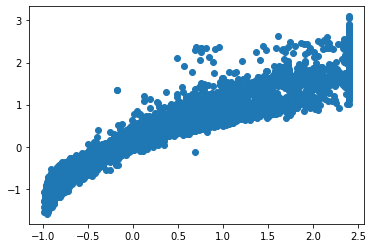

In [195]:
plt.scatter(y_test['price'], y_pred)

In [196]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.18) * carat + (0.03) * cut + (0.13) * color + (0.2) * clarity + (-0.01) * depth + (-0.01) * table + (-0.49) * x + (0.38) * y + (-0.02) * z + 

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [ ]:
# From above analysis we can say – 
#There are also some negative co-efficient values, for instance, table has its corresponding co-efficient as -0.49. This implies, the Average Diameter makes the price decreases by 49 units.
#the five important parameters which will help the company to decide the profitable price for cubic zirconia diamond
#They are - 
#Average Diameter plays an important role in increasing and decreasing the price
# Y which is the width of the cubic zirconia diamond 
#Carat which is the weight of the cubic zirconia diamond (has Highest Weightage)
#X which is the length of the cubic zirconia diamond
#Clarity which is the absence of the Inclusions and Blemishes.
#Color of the cubic zirconia diamond (has Lowest Weightage)


# Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [32]:
df2 = pd.read_csv('Holiday_Package.csv')

In [33]:
df2.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [34]:
# From the table above we can state:
# column Unnamed:0 can be dropped

In [35]:
df2.shape

(872, 8)

In [ ]:
# The data consists of 872 rows and 8 columns

In [36]:
# Dropping the Unnamed:0 column
df2 = df2.drop(['Unnamed: 0'],axis=1)

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [ ]:
# We can say:
# 1. Data has 2 object type/categorical variables which are Holliday_Package, foreign
# 2. There are 5 int type variables namely Salary, age, educ, no_young_children, no_older_children.

In [29]:
df2.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.00,0.0,0.0,1.0,1.00
Salary,872.0,45608.336869,15699.745151,8105.75,35324.0,41903.5,53469.5,80687.75
age,872.0,39.955275,10.551675,20.00,32.0,39.0,48.0,62.00
educ,872.0,9.302752,3.014712,2.00,8.0,9.0,12.0,18.00
no_young_children,872.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.00
no_older_children,872.0,0.980505,1.077197,0.00,0.0,1.0,2.0,5.00
foreign,872.0,0.247706,0.431928,0.00,0.0,0.0,0.0,1.00


In [ ]:
# We can say - 
# 1. There are total 872 rows in the dataset.
# 2. Salary variable having the count value 872 and the value of 
#    mean, standard deviation, minimum, 25%, 50%, 75% and max are 47729.2, 23418.7, 1322, 35324, 41903.5, 53469.5, 236961 respectively.
# 3. age variable having the count value 872 and the value of 
#    mean, standard deviation, minimum, 25%, 50%, 75% and max are 39.9553, 10.5517, 20, 32, 39, 48, 62 respectively.
# 4. educ variable having the count value 872 and the value of 
#    mean, standard deviation, minimum, 25%, 50%, 75% and max are 9.30734, 3.03626, 1, 8, 9, 12, 21 respectively.
# 5. no_young_children variable having the count value 872 and the value of 
#    mean, standard deviation, minimum, 25%, 50%, 75% and max are 0.311927, 0.61287, 0, 0, 0, 0, 3 respectively.
# 6. no_older_children variable having the count value 872 and the value of 
#    mean, standard deviation, minimum, 25%, 50%, 75% and max are 0.982798, 1.08679, 0, 0, 1, 2, 6 respectively.
# 7. foreign being the categorical value have 2 unique values and the top one is no with a frequency of 656.

In [30]:
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [ ]:
# We can say there are no null values in the dataset.


# Univariate Analysis

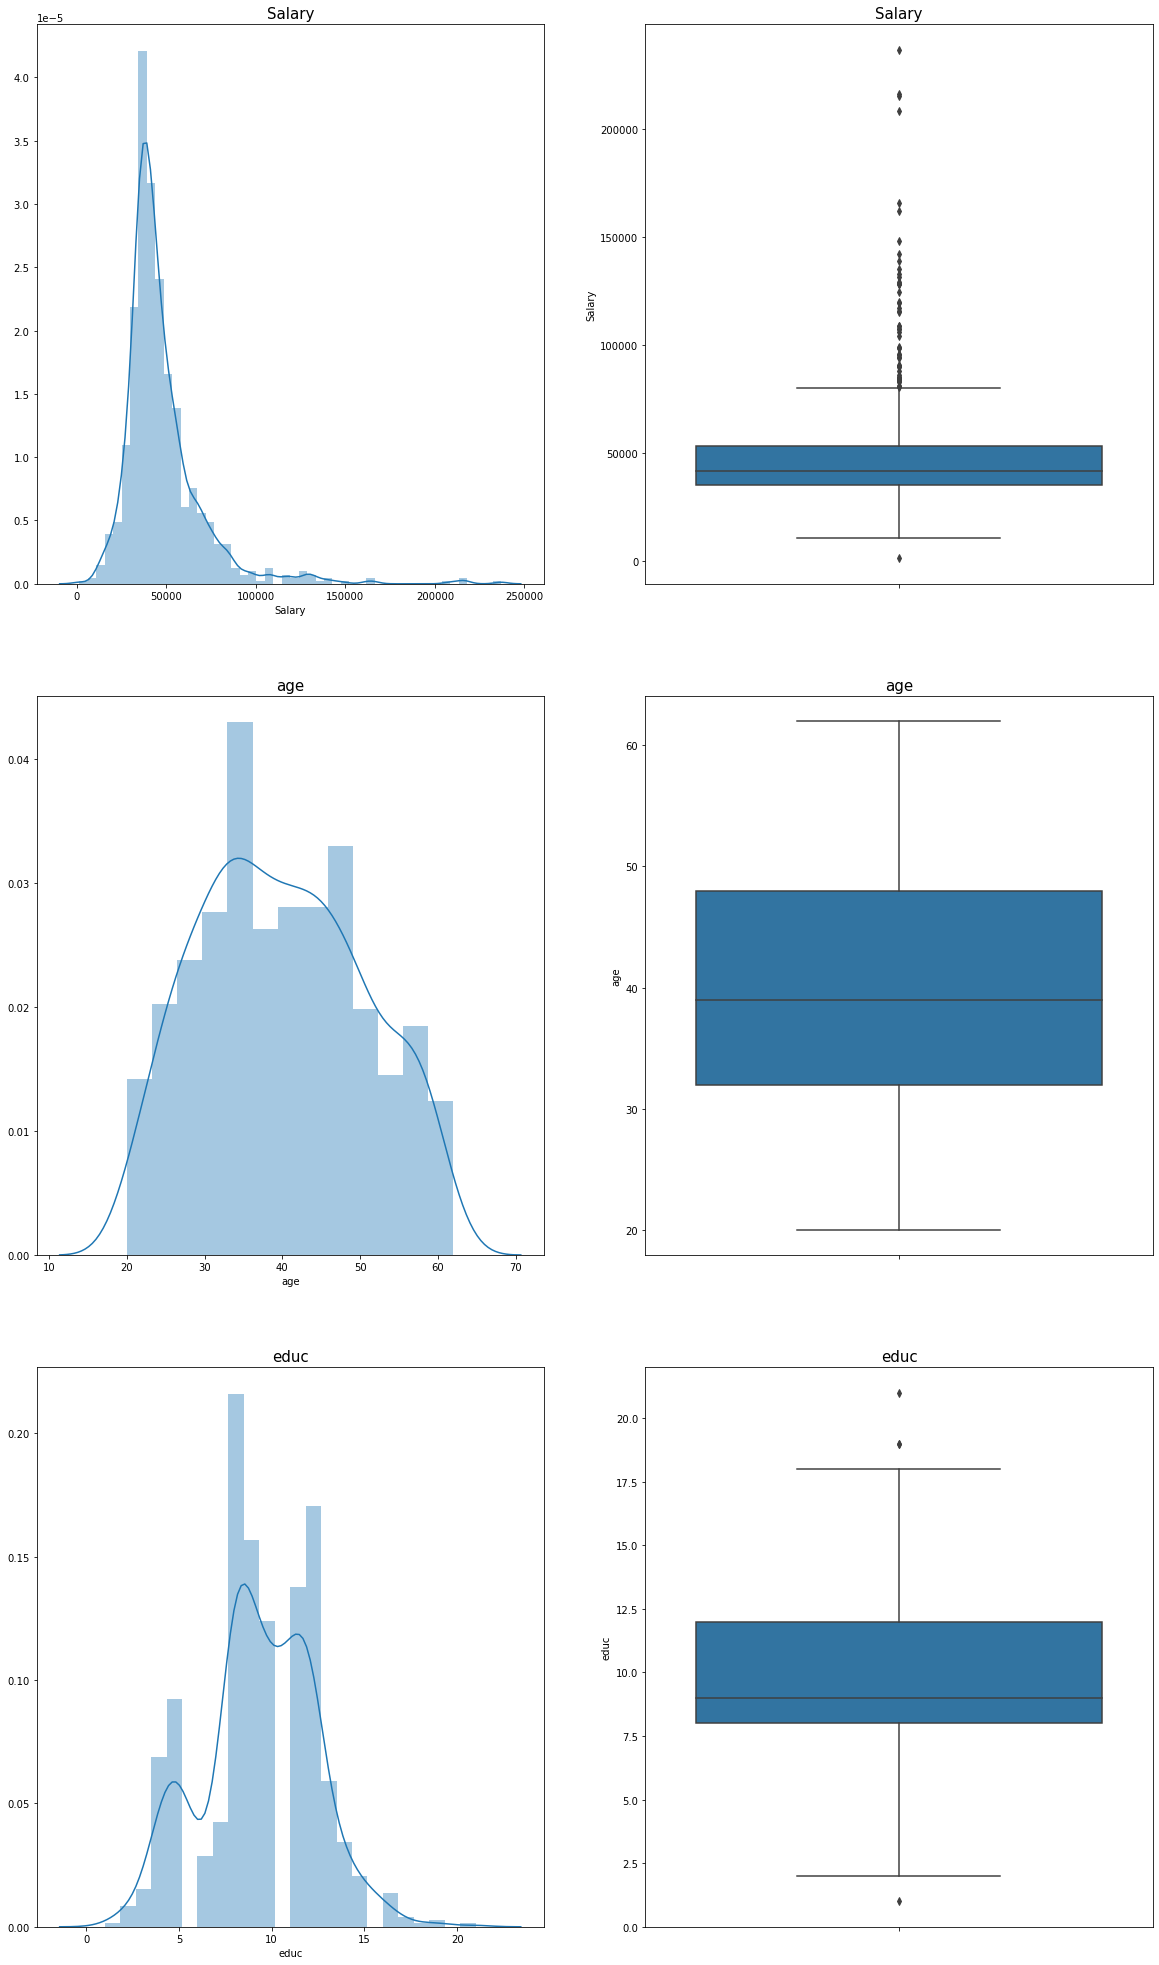

In [10]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 35)

uplot = sns.distplot(df2['Salary'] , ax=axes[0][0])
uplot.set_title("Salary",fontsize=15)
uplot = sns.boxplot(df2['Salary'] , orient = "v" , ax=axes[0][1])
uplot.set_title("Salary",fontsize=15)

uplot = sns.distplot(df2['age'] , ax=axes[1][0])
uplot.set_title("age",fontsize=15)
uplot = sns.boxplot(df2['age'] , orient = "v" , ax=axes[1][1])
uplot.set_title("age",fontsize=15)

uplot = sns.distplot(df2['educ'] , ax=axes[2][0])
uplot.set_title("educ",fontsize=15)
uplot = sns.boxplot(df2['educ'] , orient = "v" , ax=axes[2][1])
uplot.set_title("educ",fontsize=15)

plt.show()


In [ ]:
# We can say - 
# 1. Distribution of column variable salary is right skewed and has outliers
# 2. Distribution of column variable age looks normally distributed but boxplot shows there are no outliers.
# 3. Distribution of column variable educ is right skewed and also has outliers.

In [38]:
# Checking the outliers column wise
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum()
outliers

Holliday_Package       0
Salary                57
age                    0
educ                   4
foreign                0
no_older_children      2
no_young_children    207
dtype: int64

In [ ]:
# We can say - 
# 1. Salary has 57 outliers
# 2. educ has 4 outliers
# 3. no_older_children has 2 ouliers
# 4. no_young_children has 207 outliers

# Bivariate Analysis

Text(0.5, 1.0, 'no_young_children')

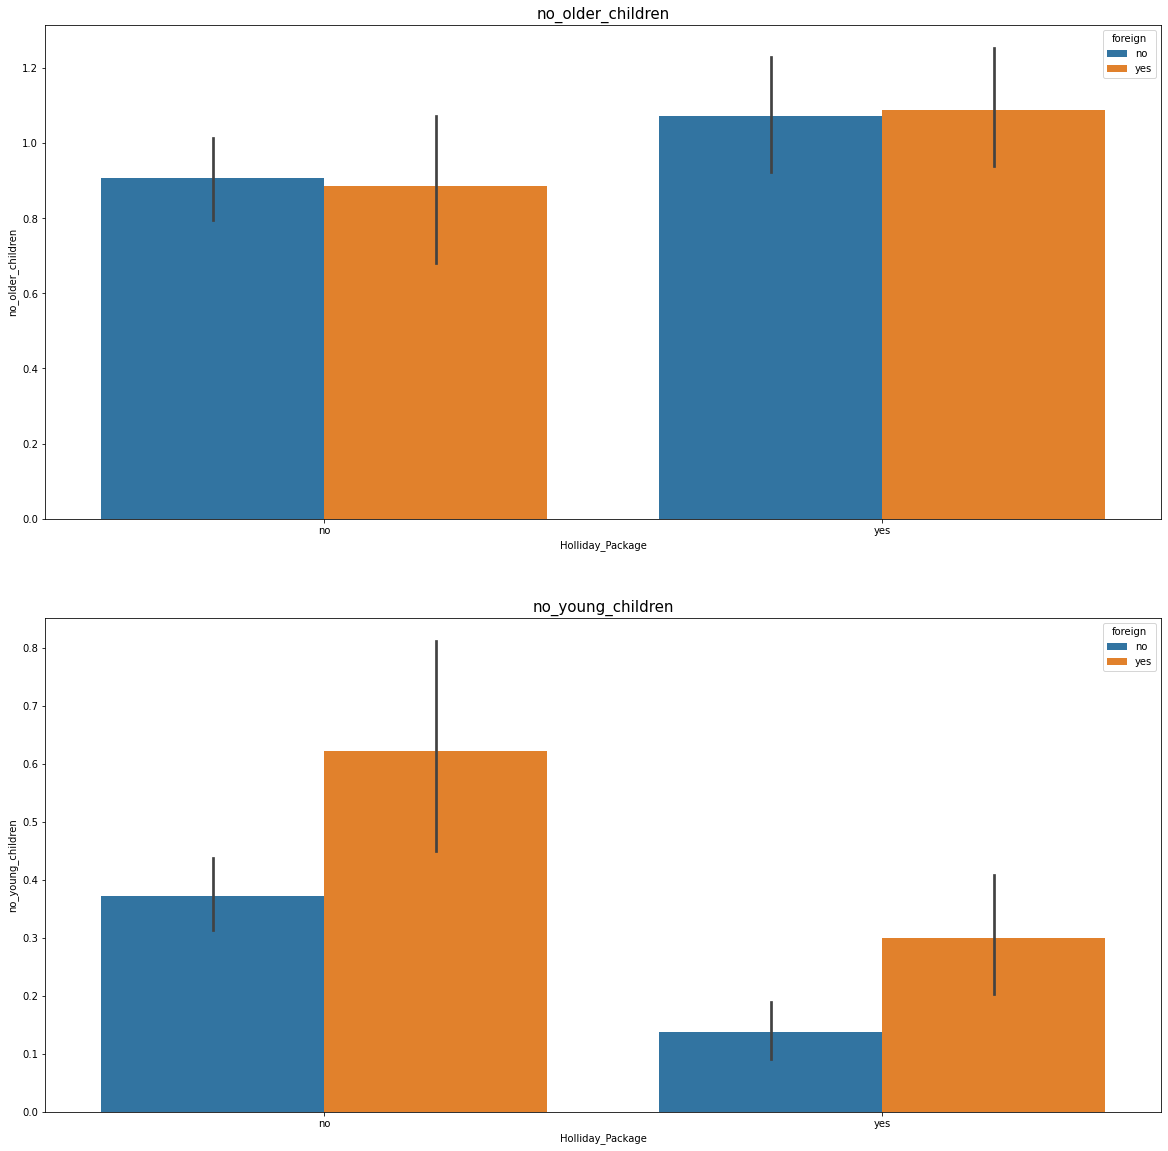

In [39]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(20, 20)

uplot = sns.barplot(df2['Holliday_Package'],df2['no_older_children'], hue=df2.foreign , ax=axes[0])
uplot.set_title("no_older_children",fontsize=15)

uplot = sns.barplot(df2['Holliday_Package'],df2['no_young_children'], hue=df2.foreign , ax=axes[1])
uplot.set_title("no_young_children",fontsize=15)


 


# Multivariate Analysis

C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


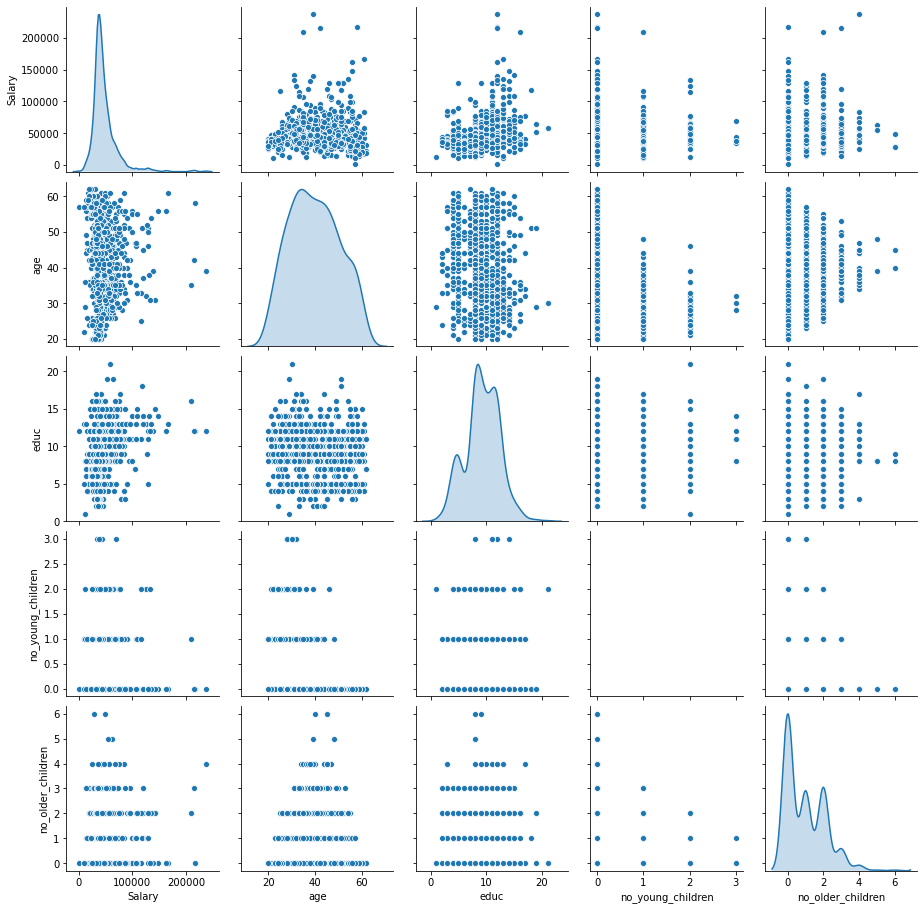

In [40]:
sns.pairplot(df2,diag_kind='kde')


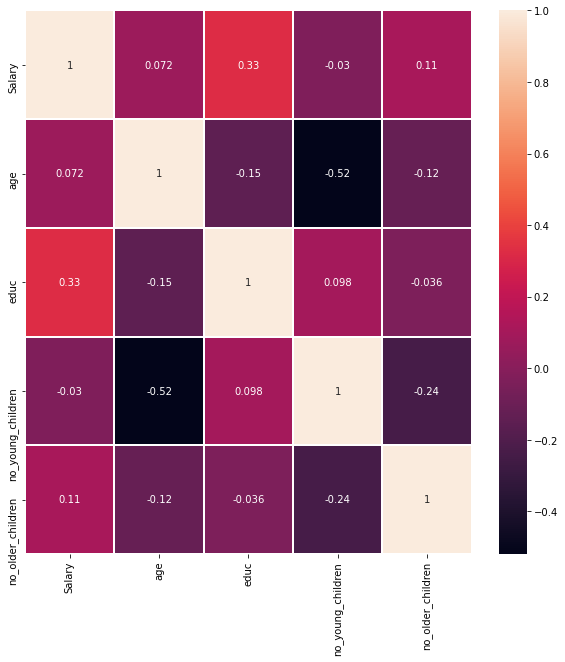

In [41]:
fix,ax = plt.subplots(figsize=(10,10))
corr = df2.corr(method='pearson')
sns.heatmap(corr,annot=True, fmt='.2g',linewidths=1)

In [ ]:
# Removing outliers

In [42]:
# Treating outliers by defining custom function to calculate upper and lower values
def remove_outlier(col):
    sorted(col)
    Q1 , Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1-(1.5 * IQR)
    Upper_range = Q3+(1.5 * IQR)
    return lower_range , Upper_range

In [43]:
lsalary,usalary=remove_outlier(df2['Salary'])
df2['Salary']=np.where(df2['Salary']>usalary,usalary,df2['Salary'])
df2['Salary']=np.where(df2['Salary']<lsalary,lsalary,df2['Salary'])

leduc,ueduc=remove_outlier(df2['educ'])
df2['educ']=np.where(df2['educ']>ueduc,ueduc,df2['educ'])
df2['educ']=np.where(df2['educ']<leduc,leduc,df2['educ'])

lold,uold=remove_outlier(df2['no_older_children'])
df2['no_older_children']=np.where(df2['no_older_children']> uold, uold,df2['no_older_children'])
df2['no_older_children']=np.where(df2['no_older_children']< lold, lold,df2['no_older_children'])

lyoung,uyoung=remove_outlier(df2['no_young_children'])
df2['no_young_children']=np.where(df2['no_young_children']> uyoung, uyoung,df2['no_young_children'])
df2['no_young_children']=np.where(df2['no_young_children']< lyoung, lyoung,df2['no_young_children'])



In [44]:
# Checking the outliers column wise
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum()
outliers

Holliday_Package     0
Salary               0
age                  0
educ                 0
foreign              0
no_older_children    0
no_young_children    0
dtype: int64

# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [45]:
# Converting data types to integer datatypes
for feature in df2.columns:
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    int8   
 1   Salary             872 non-null    float64
 2   age                872 non-null    int64  
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    int8   
dtypes: float64(4), int64(1), int8(2)
memory usage: 35.9 KB


In [ ]:
# Separating independent and target variables 

In [47]:
X = df2.drop('Holliday_Package', axis=1)

y = df2['Holliday_Package']

In [48]:
X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8.0,0.0,1.0,0
1,37207.0,45,8.0,0.0,1.0,0
2,58022.0,46,9.0,0.0,0.0,0
3,66503.0,31,11.0,0.0,0.0,0
4,66734.0,44,12.0,0.0,2.0,0


In [26]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Holliday_Package, dtype: int8

In [49]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [54]:
# Building Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_predict = lr_model.predict(X_test)

In [55]:
# Building LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X,y)
lda_model

LinearDiscriminantAnalysis()

In [56]:
lda_y_predict = lda_model.predict(X)
df3 = df2.copy()
df3['Prediction']= lda_y_predict 

In [57]:
df3.corr()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,Prediction
Holliday_Package,1.000000,-0.180214,-0.092311,-0.101116,NaN,0.078691,0.254096,0.259676
Salary,-0.180214,1.000000,0.047029,0.352913,NaN,0.124030,-0.239387,-0.364258
age,-0.092311,0.047029,1.000000,-0.149682,NaN,-0.117754,-0.107148,-0.164919
educ,-0.101116,0.352913,-0.149682,1.000000,NaN,-0.035656,-0.420922,-0.351553
no_young_children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_older_children,0.078691,0.124030,-0.117754,-0.035656,NaN,1.000000,0.022729,0.174012
foreign,0.254096,-0.239387,-0.107148,-0.420922,NaN,0.022729,1.000000,0.858111
Prediction,0.259676,-0.364258,-0.164919,-0.351553,NaN,0.174012,0.858111,1.000000


# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Performace Metrics for Logistic Regression Model

In [ ]:
# For Train Data

In [60]:
lr_train_acc = lr_model.score(X_train,y_train) 
lr_train_acc

0.5344262295081967

In [62]:
lr_y_predict_train = lr_model.predict(X_train)

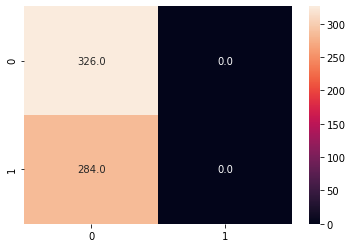

In [63]:
sns.heatmap(confusion_matrix(y_train, lr_y_predict_train),fmt='.1f',annot=True)

In [64]:
print(classification_report(y_train, lr_y_predict_train))

              precision    recall  f1-score   support

           0       0.53      1.00      0.70       326
           1       0.00      0.00      0.00       284

    accuracy                           0.53       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.53      0.37       610



C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
lr_train_metrics=classification_report(y_train, lr_y_predict_train,output_dict=True)
df_lr_train=pd.DataFrame(lr_train_metrics).transpose()
lr_train_precision=round(df_lr_train.loc["1"][1],2)
lr_train_recall=round(df_lr_train.loc["1"][2],2)
lr_train_f1=round(df_lr_train.loc["1"][0],2)

AUC: 0.591


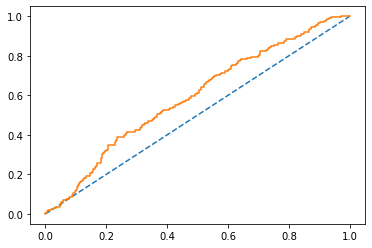

In [66]:
probs = lr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)

In [67]:
# For Test Data

In [68]:
lr_test_acc = lr_model.score(X_test,y_test) 
lr_test_acc

0.5534351145038168

In [69]:
lr_y_predict_test = lr_model.predict(X_test)

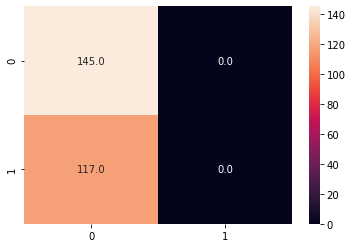

In [70]:
sns.heatmap(confusion_matrix(y_test, lr_y_predict_test),fmt='.1f',annot=True)

In [71]:
print(classification_report(y_test, lr_y_predict_test))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71       145
           1       0.00      0.00      0.00       117

    accuracy                           0.55       262
   macro avg       0.28      0.50      0.36       262
weighted avg       0.31      0.55      0.39       262



C:\Users\ARCHIT GAUTAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
lr_test_metrics=classification_report(y_test, lr_y_predict_test,output_dict=True)
df_lr_test=pd.DataFrame(lr_test_metrics).transpose()
lr_test_precision=round(df_lr_test.loc["1"][1],2)
lr_test_recall=round(df_lr_test.loc["1"][2],2)
lr_test_f1=round(df_lr_test.loc["1"][0],2)

AUC: 0.633


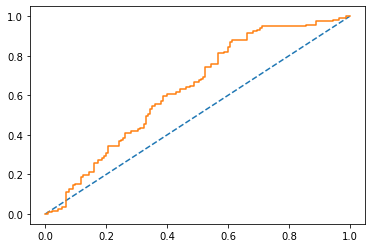

In [73]:
probs = lr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

# Performace Metrics for LDA Model

In [ ]:
# For Train Data

In [74]:
lda_train_acc = lda_model.score(X_train,y_train) 
lda_train_acc

0.6377049180327868

In [75]:
lda_y_predict_train = lda_model.predict(X_train)

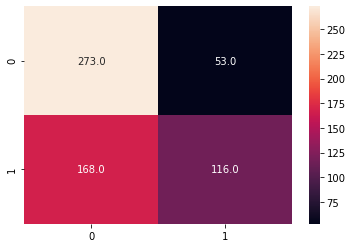

In [76]:
sns.heatmap(confusion_matrix(y_train, lda_y_predict_train),fmt='.1f',annot=True)

In [77]:
print(classification_report(y_train, lda_y_predict_train))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71       326
           1       0.69      0.41      0.51       284

    accuracy                           0.64       610
   macro avg       0.65      0.62      0.61       610
weighted avg       0.65      0.64      0.62       610



In [78]:
lda_train_metrics=classification_report(y_train, lda_y_predict_train,output_dict=True)
df_lda_train=pd.DataFrame(lda_train_metrics).transpose()
lda_train_precision=round(df_lda_train.loc["1"][1],2)
lda_train_recall=round(df_lda_train.loc["1"][2],2)
lda_train_f1=round(df_lda_train.loc["1"][0],2)

AUC: 0.662


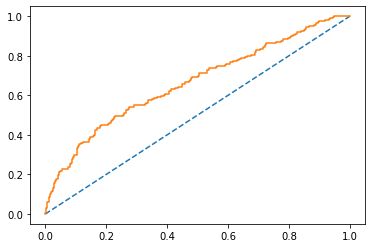

In [79]:
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [80]:
# For Test Data

In [81]:
lda_test_acc = lda_model.score(X_test,y_test) 
lda_test_acc

0.6259541984732825

In [82]:
lda_y_predict_test = lda_model.predict(X_test)

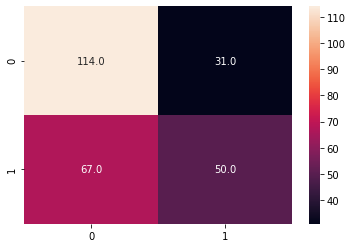

In [83]:
sns.heatmap(confusion_matrix(y_test, lda_y_predict_test),fmt='.1f',annot=True)

In [94]:
print(classification_report(y_test, lda_y_predict_test))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       145
           1       0.62      0.43      0.51       117

    accuracy                           0.63       262
   macro avg       0.62      0.61      0.60       262
weighted avg       0.62      0.63      0.61       262



In [96]:
lda_test_metrics=classification_report(y_test, lda_y_predict_test,output_dict=True)
df_lda_test=pd.DataFrame(lda_test_metrics).transpose()
lda_test_precision=round(df_lda_test.loc["1"][1],2)
lda_test_recall=round(df_lda_test.loc["1"][2],2)
lda_test_f1=round(df_lda_test.loc["1"][0],2)

AUC: 0.674


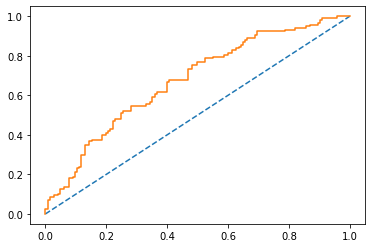

In [97]:
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

In [ ]:
# Comapring both LR Model and LDA Model

In [98]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.53,0.55,0.64,0.63
AUC,0.59,0.63,0.66,0.67
Recall,0.00,0.00,0.51,0.51
Precision,0.00,0.00,0.41,0.43
F1 Score,0.00,0.00,0.69,0.62


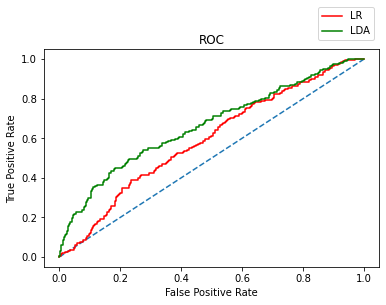

In [88]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

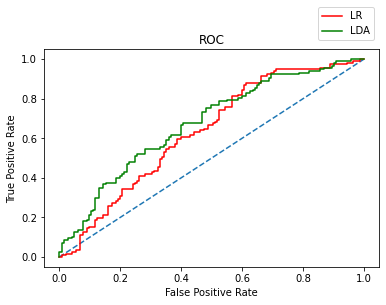

In [89]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [ ]:
# From the above analysis we can say:
# 1. Accuracy for train data for Logistic Regression Model is 53%, for Linear Discriminant Analysis Model is 64%.
# 2. Accuracy for test data for Logistic Regression Model is 55%, for Linear Discriminant Analysis Model is 63%.
# 3. AUC Score for train data for Logistic Regression Model is 59%, for Linear Discriminant Analysis Model is 66%.
# 4. AUC Score for test data for Logistic Regression Model is 63%, for Linear Discriminant Analysis Model is 67%.
# 5. Recall for train data for Logistic Regression Model is 0%, for Linear Discriminant Analysis Model is 51%.
# 6. Recall for test data for Logistic Regression Model is 0%, for Linear Discriminant Analysis Model is 51%.
# 7. Precision for train data for Logistic Regression Model is 0%, for Linear Discriminant Analysis Model is 41%.
# 8. Precision for test data for Logistic Regression Model is 0%, for Linear Discriminant Analysis Model is 43%.
# 9. F1 Score for train data for Logistic Regression Model is 0%, for Linear Discriminant Analysis Model is 69%.
# 10. F1 Score for test data for Logistic Regression Model is 0%, for Linear Discriminant Analysis Model is 62%.

# As we can see Performace Metrics of Linear Discriminant Analysis Model is far better 
# than Logistic Regression Model and can be used for making any future predictions.

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

In [90]:
from sklearn.linear_model import LinearRegression
regression_model2 = LinearRegression()
regression_model2.fit(X_train, y_train)

LinearRegression()

In [91]:
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[index]))

The coefficient for Salary is -4.135560275930995e-06
The coefficient for age is -0.0020325651700645177
The coefficient for educ is 0.014704572939515846
The coefficient for no_young_children is 2.220446049250313e-16
The coefficient for no_older_children is 0.042320617662464505
The coefficient for foreign is 0.31074104185168466


In [ ]:
# As we can see the important paramters on the basis of which the company 
# will focus on particular employees to sell their packages are foreign which has highest weightage 
# and no_older_children which has weightage of 0.042320617662464505

In [ ]:
# We can state from analysis:
# 1. The employees having less number of young children are likely to opt for holiday package
# 2. The employees having less who are foreigner are likely to opt for holiday package.

# From the business point of we can target the employees who have less young children and are foreigner.